# Raw data

In [1]:
import pandas as pd
import yaml

raw_data = pd.read_csv("../data/raw/Ramsey_base_config_0_raw.csv")
raw_data.head()

,Consumption,Capital,Output,Investment
0,1.504012,2.955255,1.570173,0.066161
1,0.609857,3.849410,1.570173,0.960316
2,0.704225,4.811868,1.752863,1.048638
3,0.797064,5.830628,1.923550,1.126486
4,0.888227,6.895545,2.083678,1.195451


# Processed data

In [2]:
parquet = pd.read_parquet("../data/interim/Ramsey_base_config_0.parquet").head()
parquet

,state,action,reward,endogenous,accumulated_reward,truncated,info,action_description,state_description,endogenous_description
0,"[2.95525480723812, 1.570173084070893]",[0.609856752205134],-0.494531,[0.9603163318657588],-0.494531,False,"{'Investment': 0.9603163318657588, 'REWARD_COM...",[Consumption],"[Capital, Output]",[Investment]
1,"[3.849409925776472, 1.752862809911673]",[0.7042250335963368],-0.350657,[1.048637776315336],-0.841440,False,"{'Investment': 1.048637776315336, 'REWARD_COMP...",[Consumption],"[Capital, Output]",[Investment]
2,"[4.811868456004412, 1.923550323451041]",[0.7970643678648222],-0.226820,[1.126485955586219],-1.063436,False,"{'Investment': 1.126485955586219, 'REWARD_COMP...",[Consumption],"[Capital, Output]",[Investment]
3,"[5.830627979798221, 2.08367758375769]",[0.8882268251931469],-0.118528,[1.195450758564544],-1.178204,False,"{'Investment': 1.195450758564544, 'REWARD_COMP...",[Consumption],"[Capital, Output]",[Investment]
4,"[6.895544673868781, 2.234422730642897]",[0.9776210849363038],-0.022633,[1.256801645706592],-1.199884,False,"{'Investment': 1.256801645706592, 'REWARD_COMP...",[Consumption],"[Capital, Output]",[Investment]


In [3]:
parquet['info'][0]

{'Investment': 0.9603163318657588,
 'REWARD_COMPUTED': -0.4945311818428375,
 'model_params': {'alpha': 0.416383,
  'beta': 0.98931,
  'c_ss': 4.370335,
  'delta': 0.022388,
  'i_ss': 1.706638,
  'k_ss': 76.231228,
  'start_capital': 2.955255,
  'y_ss': 6.076974},
 'row_id': 1}

# Dynamics from processed data (a.k.a RL transitions)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def variables_dynamics_plots(raw_data: pd.DataFrame, steady_state: dict[str, float]):
    columns = raw_data.columns

    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 4 * len(columns)), dpi=100)

    for idx, column in enumerate(columns):
        column_values = raw_data[column].to_numpy()
        steps = np.arange(len(column_values))

        ax = axes[idx]

        ax.plot(steps, column_values, marker='o', color='blue',
                label=f"Dynamics of {column}", linewidth=2)

        if column in steady_state:
            ss_values = steady_state[column]
            ax.plot(steps, ss_values, color='red', linestyle='--', linewidth=2.5,
                    label=f"Steady State {column}")
        
        ax.legend(fontsize=12)
        ax.set_xlabel("Step", fontsize=14)
        ax.set_ylabel(f"{column}", fontsize=14)
        ax.set_title(f"{column}: Transition to Steady State", fontsize=16)
        ax.set_xticks(steps[::4])
        
        ax.yaxis.set_major_locator(plt.MaxNLocator(10))
        
        ax.set_xticklabels(ax.get_xticks(), rotation=90)
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

## Ramsey base model

In [5]:
raw_data = pd.read_csv("../data/raw/Ramsey_base_config_0_raw.csv")
raw_data.head()

,Consumption,Capital,Output,Investment
0,1.504012,2.955255,1.570173,0.066161
1,0.609857,3.849410,1.570173,0.960316
2,0.704225,4.811868,1.752863,1.048638
3,0.797064,5.830628,1.923550,1.126486
4,0.888227,6.895545,2.083678,1.195451


In [6]:
with open("../data/raw/Ramsey_base_config_0_params.yaml", 'r') as f:
    params = yaml.safe_load(f)
params

{'alpha': 0.416383,
 'beta': 0.98931,
 'delta': 0.022388,
 'k_ss': 76.231228,
 'c_ss': 4.370335,
 'y_ss': 6.076974,
 'i_ss': 1.706638,
 'start_capital': 2.955255}

In [7]:
import matplotlib.pyplot as plt
import numpy as np

alpha = params['alpha']
beta = params['beta']
delta = params['delta']

k_ss = ((1 / beta - (1 - delta)) / alpha) ** (1 / (alpha - 1))
y_ss = k_ss ** alpha
i_ss = delta * k_ss
c_ss = y_ss - i_ss

steps = np.arange(raw_data.shape[0])

k_ss = k_ss * np.ones(raw_data.shape[0])
y_ss = y_ss * np.ones(raw_data.shape[0])
i_ss = i_ss * np.ones(raw_data.shape[0])
c_ss = c_ss * np.ones(raw_data.shape[0])

steady_state = {
    "Capital": k_ss,
    "Output": y_ss,
    "Investment": i_ss,
    "Consumption": c_ss
}

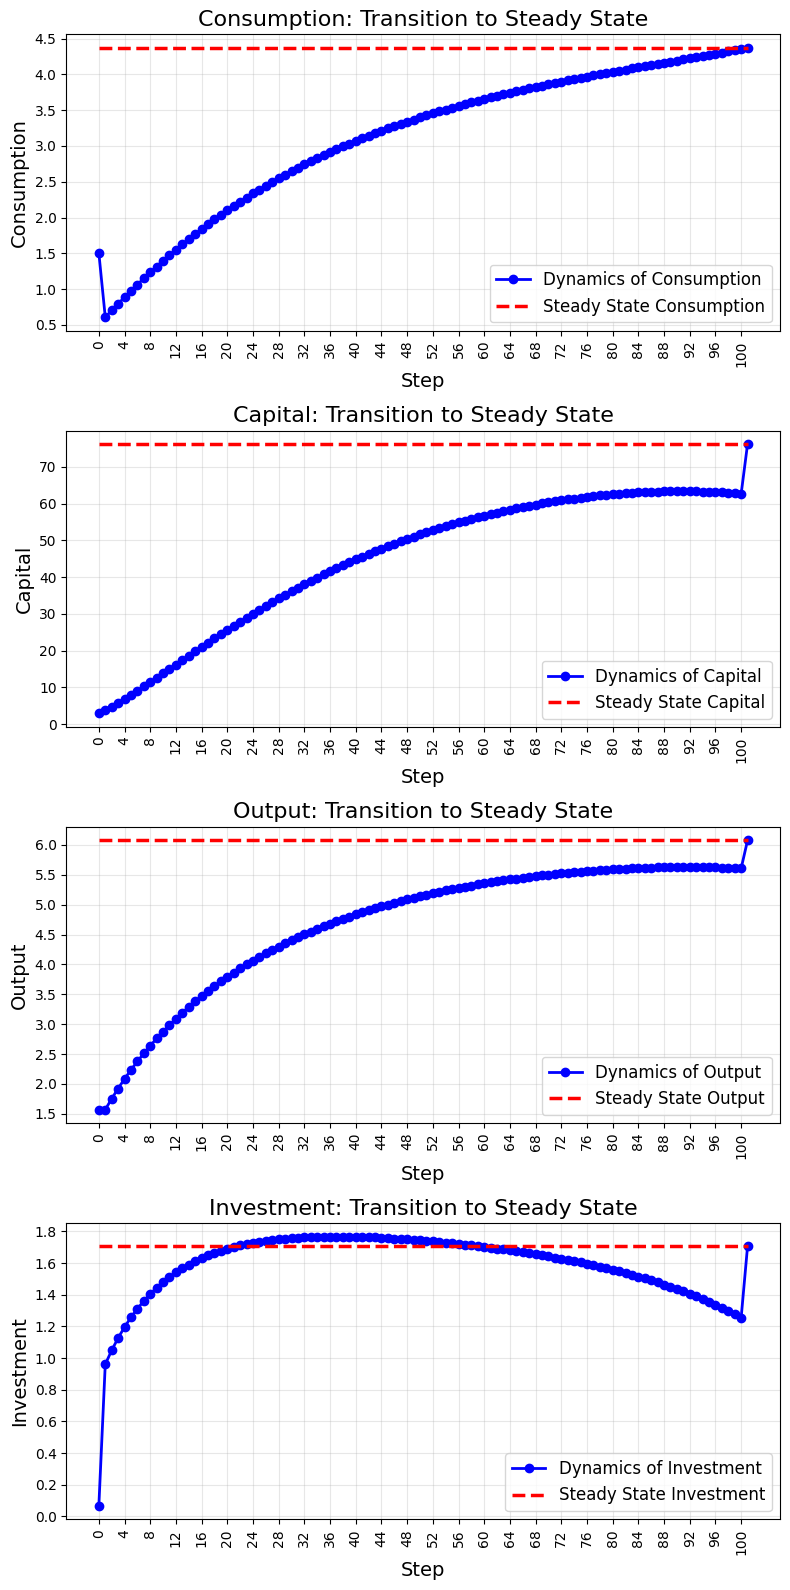

In [8]:
variables_dynamics_plots(raw_data, steady_state)

## Ramsey CRRA

In [9]:
raw_data = pd.read_csv("../data/raw/Ramsey_crra_config_0_raw.csv")
raw_data.head()

,ConsumptionPerCapita,CapitalPerCapita,OutputPerCapita,InvestmentPerCapita,Labor,Consumption,Capital,Output
0,0.650403,0.518087,0.675574,0.025170,1.000000,0.650403,0.518087,0.675574
1,0.070132,1.098358,0.675574,0.605441,1.010049,0.070837,1.109396,0.682363
2,0.128608,1.973935,1.057546,0.928938,1.020200,0.131206,2.013807,1.078908
3,0.208445,3.169735,1.500145,1.291700,1.030452,0.214793,3.266260,1.545828
4,0.309896,4.695623,1.989779,1.679883,1.040807,0.322542,4.887239,2.070977


In [10]:
raw_data.tail()

,ConsumptionPerCapita,CapitalPerCapita,OutputPerCapita,InvestmentPerCapita,Labor,Consumption,Capital,Output
97,14.389115,218.384467,24.847134,10.458020,2.637735,37.954675,576.040407,65.540163
98,14.441010,218.169999,24.836318,10.395307,2.664243,38.474357,581.257839,66.169979
99,14.493665,217.898747,24.821768,10.328103,2.691017,39.002693,586.369154,66.795791
100,14.547238,217.568690,24.803358,10.256120,2.718060,39.540260,591.364663,67.417006
101,14.601899,239.248639,26.225318,11.623419,2.718060,39.688832,650.292056,71.281977


In [11]:
with open("../data/raw/Ramsey_crra_config_0_params.yaml", 'r') as f:
    params = yaml.safe_load(f)
params

{'alpha': 0.596389,
 'beta': 0.983487,
 'delta': 0.039022,
 'sigma': 0.669161,
 'n': 0.010049,
 'k_ss': 239.248639,
 'c_ss': 14.601899,
 'y_ss': 26.225318,
 'i_ss': 11.623419,
 'start_capital': 0.518087,
 'start_labor': 1.0}

In [12]:
alpha = params['alpha']
beta = params['beta']
delta = params['delta']
sigma = params['sigma']
n = params['n']
start_labor = params['start_labor']

k_percap_ss = ((1/beta - (1 - delta) / (1 + n)) / alpha) ** (1/(alpha - 1))
y_percap_ss = k_percap_ss ** alpha
i_percap_ss = k_percap_ss * (delta + n) / (1 + n)
c_percap_ss = y_percap_ss - i_percap_ss

k_percap_ss_array = k_percap_ss * np.ones(raw_data.shape[0])
y_percap_ss_array = y_percap_ss * np.ones(raw_data.shape[0])
i_percap_ss_array = i_percap_ss * np.ones(raw_data.shape[0])
c_percap_ss_array = c_percap_ss * np.ones(raw_data.shape[0])

steps = np.arange(raw_data.shape[0])
labor_ss_array = start_labor * (1 + n) ** steps

capital_ss_array = k_percap_ss_array * labor_ss_array
output_ss_array = y_percap_ss_array * labor_ss_array
investment_ss_array = i_percap_ss_array * labor_ss_array
consumption_ss_array = c_percap_ss_array * labor_ss_array

steady_state = {
    "ConsumptionPerCapita": c_percap_ss_array,
    "CapitalPerCapita": k_percap_ss_array,
    "OutputPerCapita": y_percap_ss_array,
    "InvestmentPerCapita": i_percap_ss_array,
    "Labor": labor_ss_array,
    "Consumption": consumption_ss_array,
    "Capital": capital_ss_array,
    "Output": output_ss_array,
}

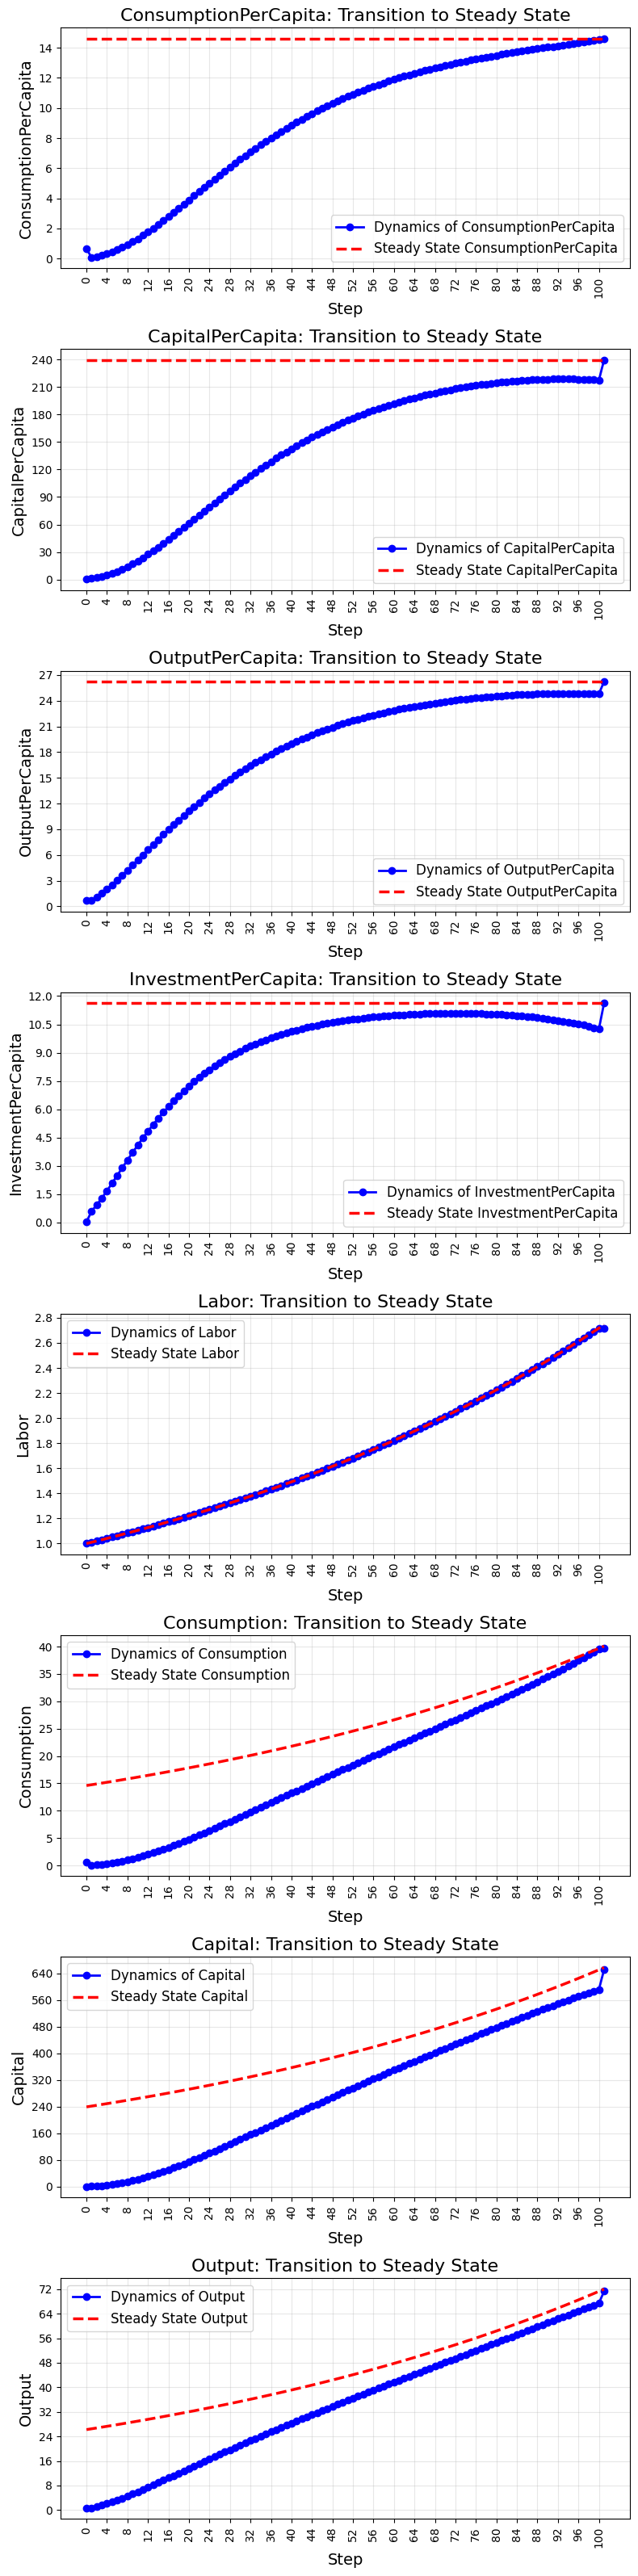

In [13]:
variables_dynamics_plots(raw_data, steady_state)

## Ramsey CARA

In [14]:
raw_data = pd.read_csv("../data/raw/Ramsey_cara_config_0_raw.csv")
raw_data.head()

,ConsumptionPerCapita,CapitalPerCapita,OutputPerCapita,InvestmentPerCapita,Labor,Consumption,Capital,Output
0,1.060394,1.465846,1.245776,0.185382,1.000000,1.060394,1.465846,1.245776
1,0.792448,1.733792,1.245776,0.453328,1.017193,0.806073,1.763601,1.267195
2,0.886361,2.000104,1.371942,0.485581,1.034683,0.917102,2.069472,1.419524
3,0.972218,2.264281,1.489344,0.517126,1.052472,1.023232,2.383093,1.567493
4,1.051341,2.525974,1.599392,0.548052,1.070568,1.125532,2.704228,1.712258


In [15]:
with open("../data/raw/Ramsey_cara_config_0_params.yaml", 'r') as f:
    params = yaml.safe_load(f)
params

{'alpha': 0.574634,
 'beta': 0.954926,
 'delta': 0.111449,
 'sigma': 2.531403,
 'n': 0.017193,
 'k_ss': 16.660705,
 'c_ss': 2.928271,
 'y_ss': 5.035313,
 'i_ss': 2.107042,
 'start_capital': 1.465846,
 'start_labor': 1.0}

In [16]:
alpha = params['alpha']
beta = params['beta']
delta = params['delta']
sigma = params['sigma']
n = params['n']
start_labor = params['start_labor']

k_percap_ss = ((1/beta - (1 - delta) / (1 + n)) / alpha) ** (1/(alpha - 1))
y_percap_ss = k_percap_ss ** alpha
i_percap_ss = (delta + n) * k_percap_ss 
c_percap_ss = y_percap_ss - i_percap_ss 

k_percap_ss_array = k_percap_ss * np.ones(raw_data.shape[0])
y_percap_ss_array = y_percap_ss * np.ones(raw_data.shape[0])
i_percap_ss_array = i_percap_ss * np.ones(raw_data.shape[0])
c_percap_ss_array = c_percap_ss * np.ones(raw_data.shape[0])

steps = np.arange(raw_data.shape[0])
labor_ss_array = start_labor * (1 + n) ** steps
capital_ss_array = k_percap_ss_array * labor_ss_array
output_ss_array = y_percap_ss_array * labor_ss_array
investment_ss_array = i_percap_ss_array * labor_ss_array
consumption_ss_array = c_percap_ss_array * labor_ss_array

steady_state = {
    "ConsumptionPerCapita": c_percap_ss_array,
    "CapitalPerCapita": k_percap_ss_array,
    "OutputPerCapita": y_percap_ss_array,
    "InvestmentPerCapita": i_percap_ss_array,
    "Labor": labor_ss_array,
    "Consumption": consumption_ss_array,
    "Capital": capital_ss_array,
    "Output": output_ss_array,
}

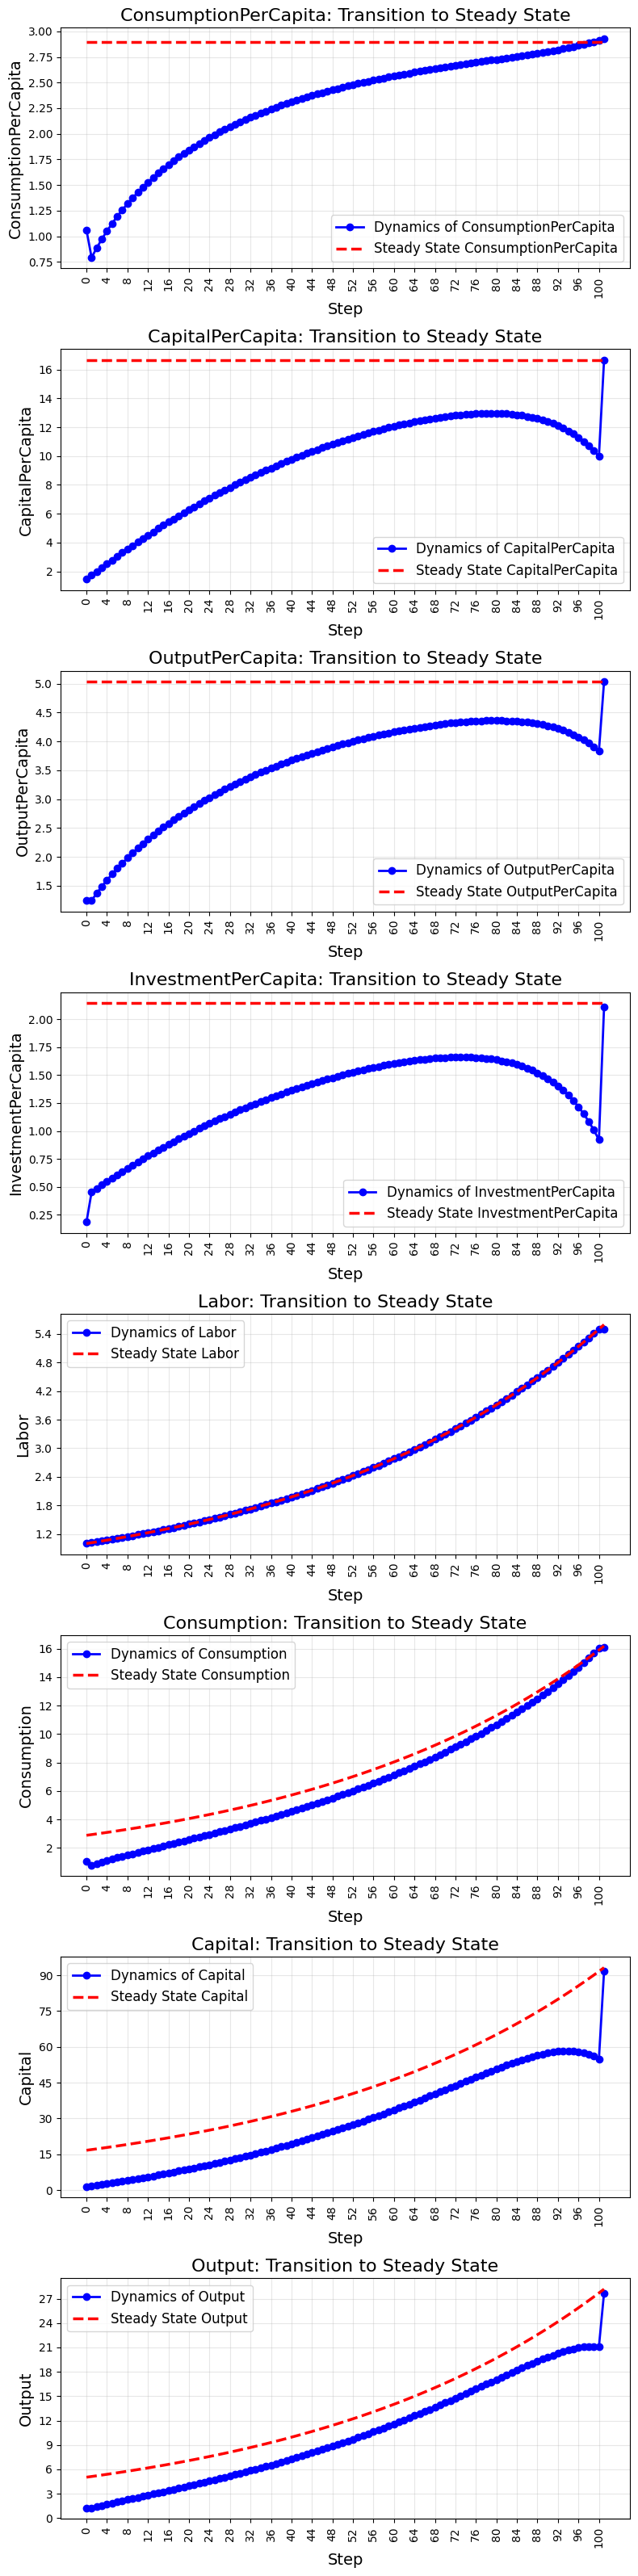

In [17]:
variables_dynamics_plots(raw_data, steady_state)

## Ramsey upgrade

In [18]:
raw_data = pd.read_csv("../data/raw/Ramsey_upgrade_config_0_raw.csv")
raw_data.head()

,ConsumptionPerCapita,CapitalPerCapita,OutputPerCapita,InvestmentPerCapita,ConsumptionPerEffectiveLabor,CapitalPerEffectiveLabor,OutputPerEffectiveLabor,InvestmentPerEffectiveLabor,Labor,Technology,InterestRate,GrossReturn,MarginalProductCapital,WagePerEffectiveLabor,Consumption,Capital,Output
0,1.161117,2.827415,1.550469,0.389353,1.161117,2.827415,1.550469,0.389353,1.000000,1.000000,0.127117,1.127117,0.231384,0.896251,1.161117,2.827415,1.550469
1,1.108726,2.994162,1.596012,0.487285,1.077089,2.908724,1.550469,0.473381,1.003950,1.029373,0.127117,1.127117,0.231384,0.896251,1.113106,3.005988,1.602316
2,1.158709,3.159064,1.662663,0.503954,1.093525,2.981350,1.569129,0.475604,1.007916,1.059609,0.123355,1.123355,0.227623,0.907037,1.167881,3.184070,1.675824
3,1.208595,3.322500,1.729403,0.520808,1.108058,3.046118,1.585543,0.477484,1.011897,1.090733,0.120134,1.120134,0.224401,0.916525,1.222974,3.362027,1.749978
4,1.258519,3.484857,1.796418,0.537899,1.120905,3.103801,1.599986,0.479082,1.015894,1.122771,0.117363,1.117363,0.221630,0.924874,1.278522,3.540245,1.824970


In [19]:
with open("../data/raw/Ramsey_upgrade_config_0_params.yaml", 'r') as f:
    params = yaml.safe_load(f)
params

{'alpha': 0.421949,
 'beta': 0.950104,
 'delta': 0.104267,
 'sigma': 1.476961,
 'n': 0.00395,
 'g': 0.029373,
 'k_tilde_ss': 3.552979,
 'c_tilde_ss': 1.21808,
 'y_tilde_ss': 1.707347,
 'i_tilde_ss': 0.489268,
 'r_ss': 0.098496,
 'start_capital': 2.827415,
 'start_labor': 1.0,
 'start_technology': 1.0}

In [20]:
alpha = params['alpha']
beta = params['beta']
delta = params['delta']
sigma = params['sigma']
n = params['n']
g = params['g']
start_labor = params['start_labor']
start_technology = params['start_technology']

r_ss = (1 + g) ** sigma / beta - 1
k_per_effcap_ss = (alpha / (r_ss + delta)) ** (1/(1 - alpha))
y_per_effcap_ss = k_per_effcap_ss ** alpha
i_per_effcap_ss = (delta + n + g + n*g) * k_per_effcap_ss 
c_per_effcap_ss = y_per_effcap_ss - i_per_effcap_ss 

k_per_effcap_ss_array = k_per_effcap_ss * np.ones(raw_data.shape[0])
y_per_effcap_ss_array = y_per_effcap_ss * np.ones(raw_data.shape[0])
i_per_effcap_ss_array = i_per_effcap_ss * np.ones(raw_data.shape[0])
c_per_effcap_ss_array = c_per_effcap_ss * np.ones(raw_data.shape[0])

steps = np.arange(raw_data.shape[0])
labor_ss_array = start_labor * (1 + n) ** steps
tech_ss_array = start_technology * (1 + g) ** steps

marginal_product_capital_ss_array = alpha * k_per_effcap_ss_array ** (alpha - 1)
interest_rate_ss_array = marginal_product_capital_ss_array - delta
gross_return_ss_array = 1 + interest_rate_ss_array
wage_per_effcap_ss_array = (1 - alpha) * y_per_effcap_ss_array

capital_percap_ss_array = k_per_effcap_ss_array * tech_ss_array
output_percap_ss_array = y_per_effcap_ss_array * tech_ss_array
investment_percap_ss_array = i_per_effcap_ss_array * tech_ss_array
consumption_percap_ss_array = c_per_effcap_ss_array * tech_ss_array

capital_ss_array = capital_percap_ss_array * labor_ss_array
output_ss_array = output_percap_ss_array * labor_ss_array
consumption_ss_array = consumption_percap_ss_array * labor_ss_array

steady_state = {
    'ConsumptionPerEffectiveLabor': c_per_effcap_ss_array,
    'CapitalPerEffectiveLabor': k_per_effcap_ss_array,
    'OutputPerEffectiveLabor': y_per_effcap_ss_array,
    'InvestmentPerEffectiveLabor': i_per_effcap_ss_array,
    'ConsumptionPerCapita': consumption_percap_ss_array,
    'CapitalPerCapita': capital_percap_ss_array,
    'OutputPerCapita': output_percap_ss_array,
    'InvestmentPerCapita': investment_percap_ss_array,
    'MarginalProductCapital': marginal_product_capital_ss_array,
    'InterestRate': interest_rate_ss_array,
    'GrossReturn': gross_return_ss_array,
    'WagePerEffectiveLabor': wage_per_effcap_ss_array,
    'Labor': labor_ss_array,
    'Technology': tech_ss_array,
    'Consumption': consumption_ss_array,
    'Capital': capital_ss_array,
    'Output': output_ss_array,
}

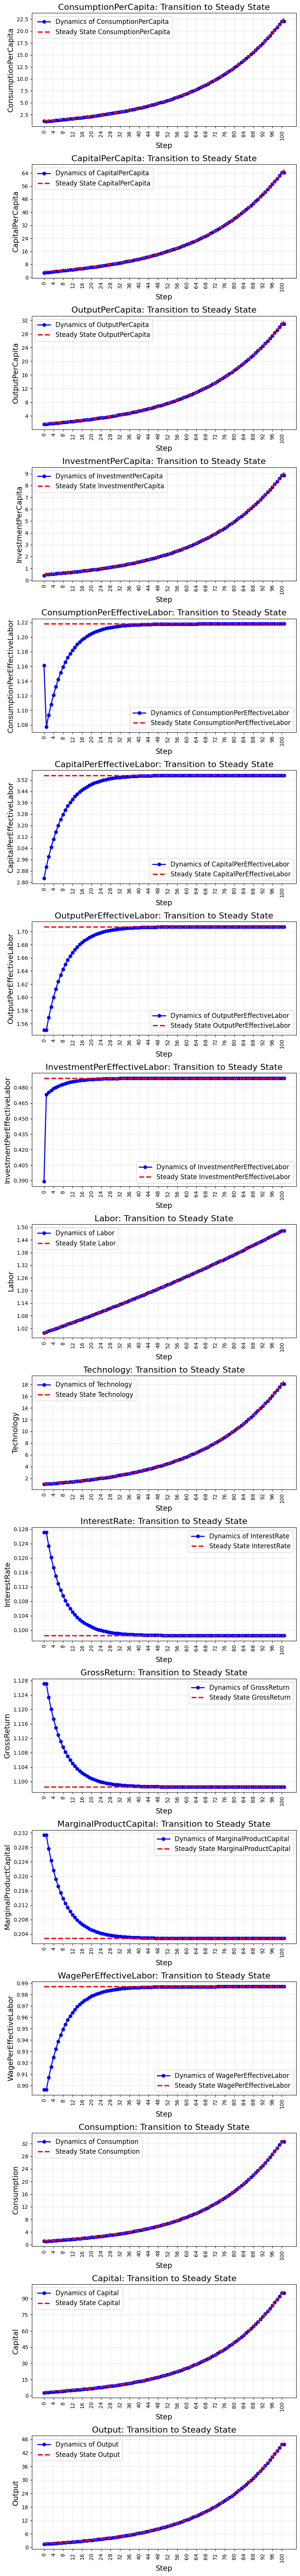

In [21]:
variables_dynamics_plots(raw_data, steady_state)

## OLG

In [22]:
raw_data = pd.read_csv("../data/raw/OLG_config_0_raw.csv")
raw_data.head()

,ConsYoung,ConsOld,Savings,Capital,Output,Wage,InterestRate
0,0.440434,0.123670,0.250115,1.262404,1.088998,0.690549,-0.505548
1,0.440434,0.123670,0.250115,0.187907,1.088998,0.690549,-0.505548
2,0.219381,0.308900,0.124583,0.093597,0.542433,0.343964,0.235031
3,0.170002,0.226990,0.096541,0.072530,0.420339,0.266543,0.821996
4,0.154858,0.203739,0.087941,0.066069,0.382894,0.242799,1.110388


In [23]:
with open("../data/raw/OLG_config_0_params.yaml", 'r') as f:
    params = yaml.safe_load(f)
params

{'alpha': 0.365886,
 'beta': 0.567883,
 'delta': 0.821175,
 'n': 0.06726,
 'g': 0.247173,
 'start_capital': 1.262404,
 'k_ss': 0.062606,
 'y_ss': 0.362826,
 'w_ss': 0.230073,
 'r_ss': 1.299282,
 's_ss': 0.083332,
 'c1_ss': 0.146741,
 'c2_ss': 0.191603}

In [24]:
alpha = params['alpha']
beta = params['beta']
delta = params['delta']
n = params['n']
g = params['g']

k_ss = ((beta * (1 - alpha)) / ((1 + beta) * (1 + n) * (1 + g))) ** (1 / (1 - alpha))
y_ss = k_ss ** alpha
w_ss = (1 - alpha) * y_ss
r_ss = alpha * k_ss ** (alpha - 1) - delta
s_ss = beta / (1 + beta) * w_ss
c1_ss = w_ss - s_ss
c2_ss = (1 + r_ss) * s_ss

c1_ss_array = c1_ss * np.ones(raw_data.shape[0])
c2_ss_array = c2_ss * np.ones(raw_data.shape[0])
s_ss_array = s_ss * np.ones(raw_data.shape[0])
k_ss_array = k_ss * np.ones(raw_data.shape[0])
y_ss_array = y_ss * np.ones(raw_data.shape[0])
w_ss_array = w_ss * np.ones(raw_data.shape[0])
r_ss_array = r_ss * np.ones(raw_data.shape[0])

steady_state = {
    'ConsYoung': c1_ss_array,
    'ConsOld': c2_ss_array,
    'Savings': s_ss_array,
    'Capital': k_ss_array,
    'Output': y_ss_array,
    'Wage': w_ss_array,
    'InterestRate': r_ss_array,
}

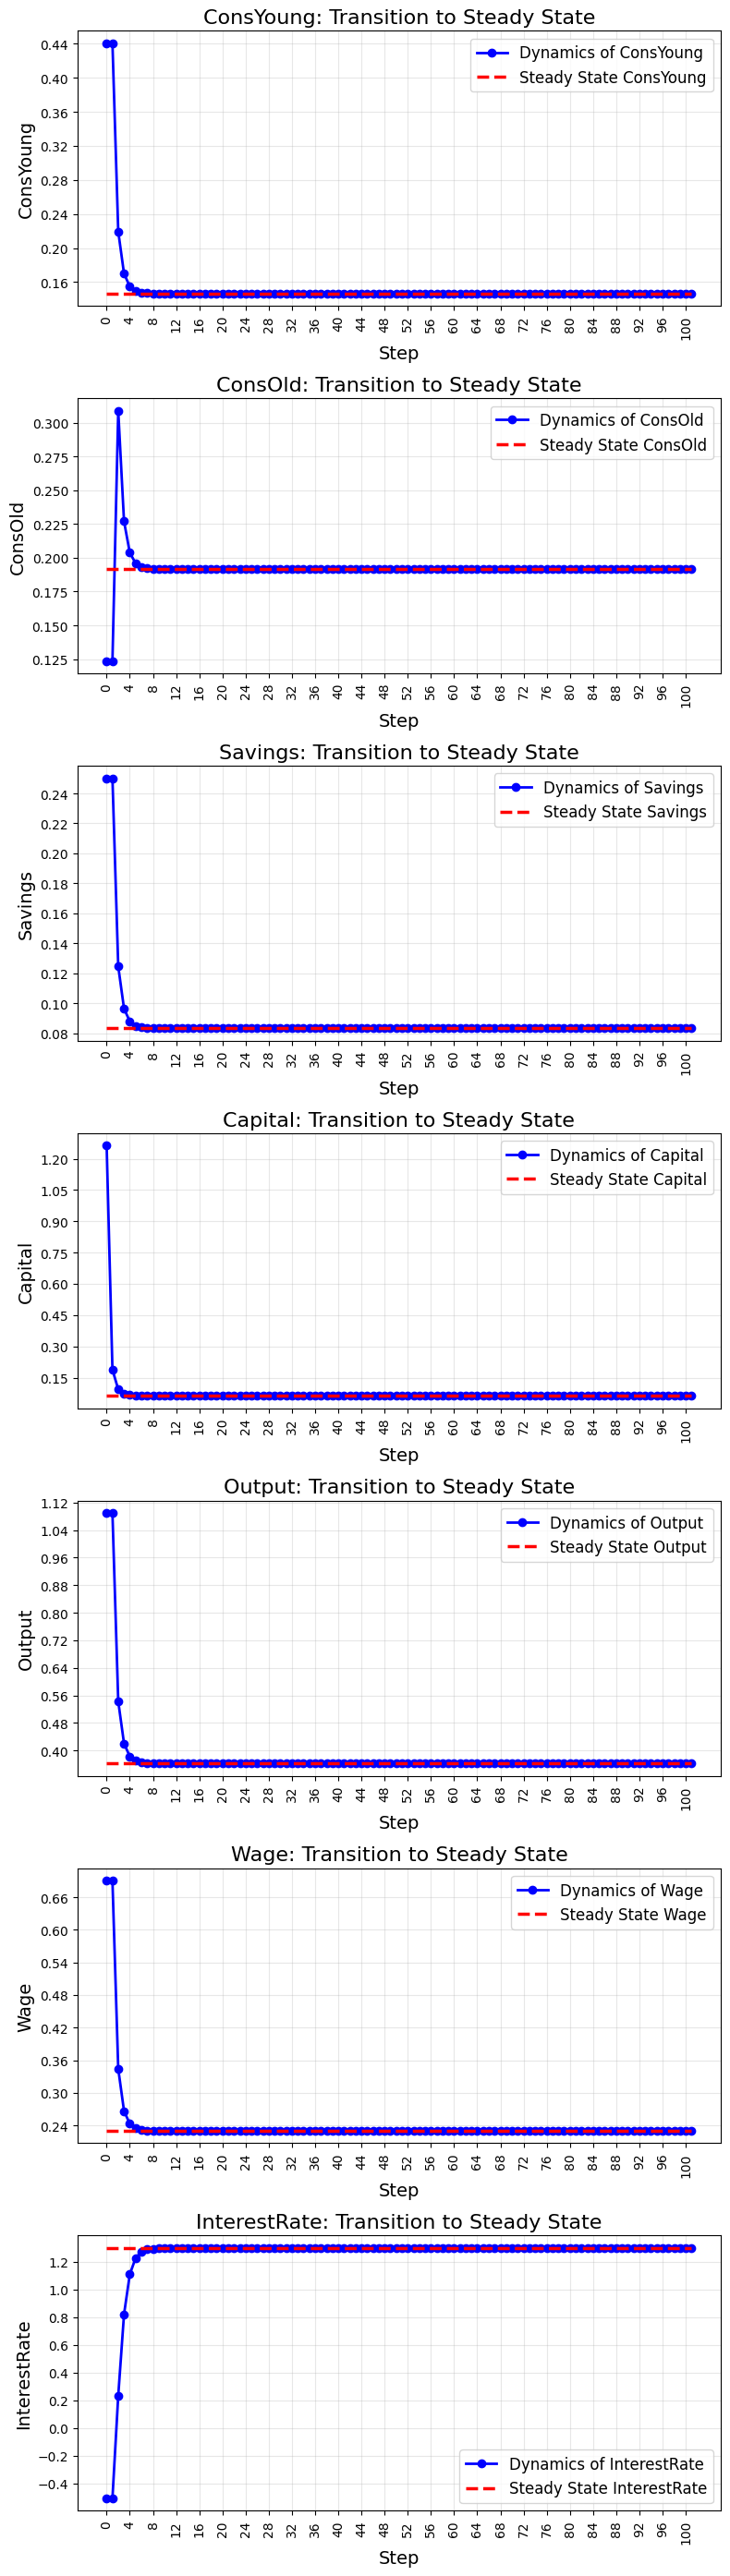

In [25]:
variables_dynamics_plots(raw_data, steady_state)

## RBC_baseline_perfect_foresight

In [26]:
raw_data = pd.read_csv("../data/raw/RBC_baseline_pf_config_0_raw.csv")
raw_data.head()

,Consumption,Capital,Output,Investment,LoggedProductivity,Productivity,InterestRate
0,2.127202,15.296368,2.459881,0.332680,0.0,1.0,0.031320
1,2.115389,15.308181,2.459881,0.344492,0.0,1.0,0.031292
2,2.115333,15.320419,2.460508,0.345175,0.0,1.0,0.031264
3,2.115219,15.333155,2.461157,0.345938,0.0,1.0,0.031235
4,2.115044,15.346464,2.461832,0.346788,0.0,1.0,0.031204


In [27]:
with open("../data/raw/RBC_baseline_pf_config_0_params.yaml", 'r') as f:
    params = yaml.safe_load(f)

params

{'alpha': 0.33,
 'beta': 0.969631,
 'delta': 0.021749,
 'rho': 0.880575,
 'sigma': 1.0,
 'k_ss': 15.296368,
 'c_ss': 2.127202,
 'y_ss': 2.459881,
 'r_ss': 0.03132}

In [28]:
beta = params["beta"]
alpha = params["alpha"]
delta = params["delta"]
rho = params["rho"]

k_ss = ((1 / beta - (1 - delta)) / alpha) ** (1 / (alpha - 1))
y_ss = k_ss ** alpha
i_ss = delta * k_ss
c_ss = y_ss - i_ss
r_ss = 1 / beta - 1
logged_productivity_ss = 0
productivity_ss = np.exp(logged_productivity_ss)

steps = np.arange(raw_data.shape[0])

k_ss = k_ss * np.ones(raw_data.shape[0])
y_ss = y_ss * np.ones(raw_data.shape[0])
i_ss = i_ss * np.ones(raw_data.shape[0])
c_ss = c_ss * np.ones(raw_data.shape[0])
r_ss = r_ss * np.ones(raw_data.shape[0])
logged_productivity_ss = logged_productivity_ss * np.ones(raw_data.shape[0])
productivity_ss = productivity_ss * np.ones(raw_data.shape[0])

steady_state = {
    'Capital': k_ss,
    'Output': y_ss,
    'Investment': i_ss,
    'Consumption': c_ss,
    'LoggedProductivity': logged_productivity_ss,
    'Productivity': productivity_ss,
    'InterestRate': r_ss,
}

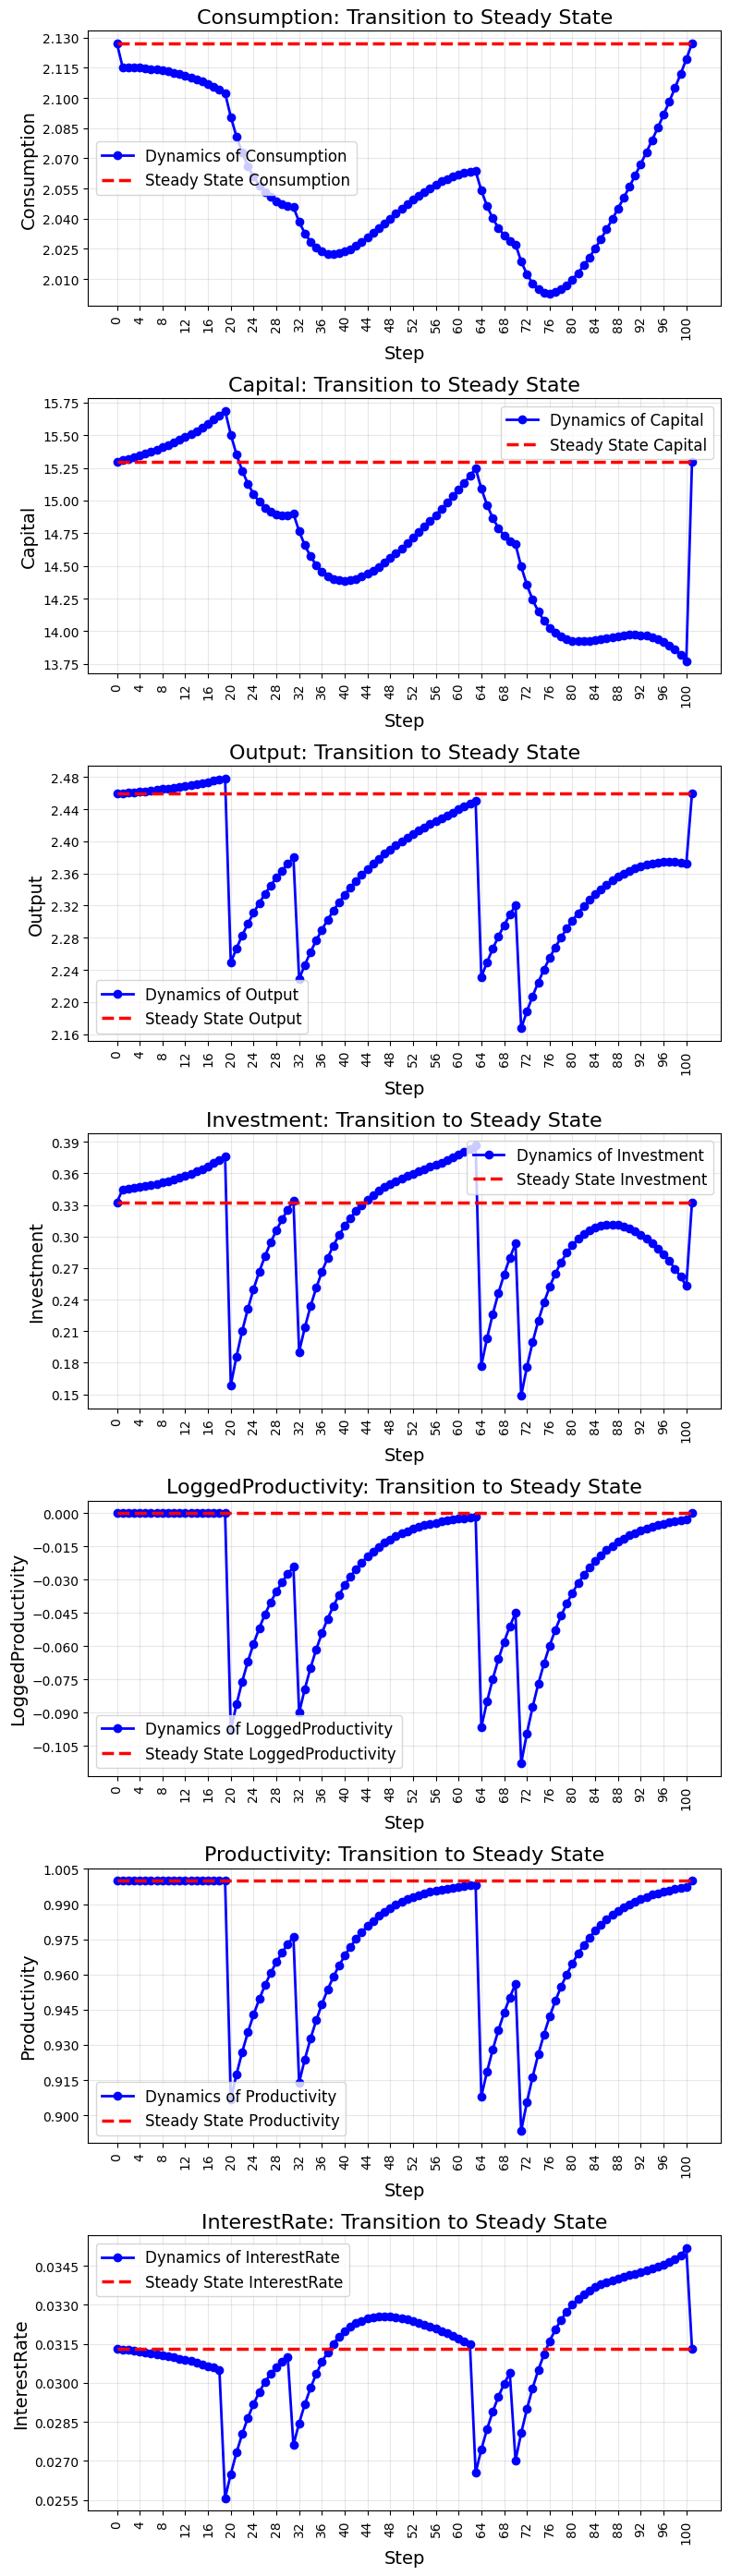

In [29]:
variables_dynamics_plots(raw_data, steady_state)

## RBC_baseline_stoch

In [34]:
raw_data = pd.read_csv("../data/raw/RBC_baseline_stoch_config_0_raw.csv")
raw_data.head()

,Consumption,Capital,Output,Investment,LoggedProductivity,Productivity,InterestRate
0,1.767378,12.478406,2.245357,0.477980,-0.024935,0.975065,0.017747
1,1.772921,12.470823,2.286745,0.513824,-0.005768,0.994232,0.018766
2,1.768559,12.449742,2.268568,0.500009,-0.013462,0.986538,0.018435
3,1.772744,12.452230,2.295442,0.522698,-0.001236,0.998764,0.019061
4,1.778741,12.476252,2.323076,0.544335,0.010698,1.010698,0.019603


In [35]:
with open("../data/raw/RBC_baseline_pf_config_0_params.yaml", 'r') as f:
    params = yaml.safe_load(f)

params

{'alpha': 0.33,
 'beta': 0.967383,
 'delta': 0.044803,
 'rho': 0.808992,
 'sigma': 1.0,
 'k_ss': 8.524111,
 'c_ss': 1.64631,
 'y_ss': 2.028216,
 'r_ss': 0.033717}

In [36]:
beta = params["beta"]
alpha = params["alpha"]
delta = params["delta"]
rho = params["rho"]

k_ss = ((1 / beta - (1 - delta)) / alpha) ** (1 / (alpha - 1))
y_ss = k_ss ** alpha
i_ss = delta * k_ss
c_ss = y_ss - i_ss
r_ss = 1 / beta - 1
logged_productivity_ss = 0
productivity_ss = np.exp(logged_productivity_ss)

steps = np.arange(raw_data.shape[0])

k_ss = k_ss * np.ones(raw_data.shape[0])
y_ss = y_ss * np.ones(raw_data.shape[0])
i_ss = i_ss * np.ones(raw_data.shape[0])
c_ss = c_ss * np.ones(raw_data.shape[0])
r_ss = r_ss * np.ones(raw_data.shape[0])
logged_productivity_ss = logged_productivity_ss * np.ones(raw_data.shape[0])
productivity_ss = productivity_ss * np.ones(raw_data.shape[0])

steady_state = {
    'Capital': k_ss,
    'Output': y_ss,
    'Investment': i_ss,
    'Consumption': c_ss,
    'LoggedProductivity': logged_productivity_ss,
    'Productivity': productivity_ss,
    'InterestRate': r_ss,
}

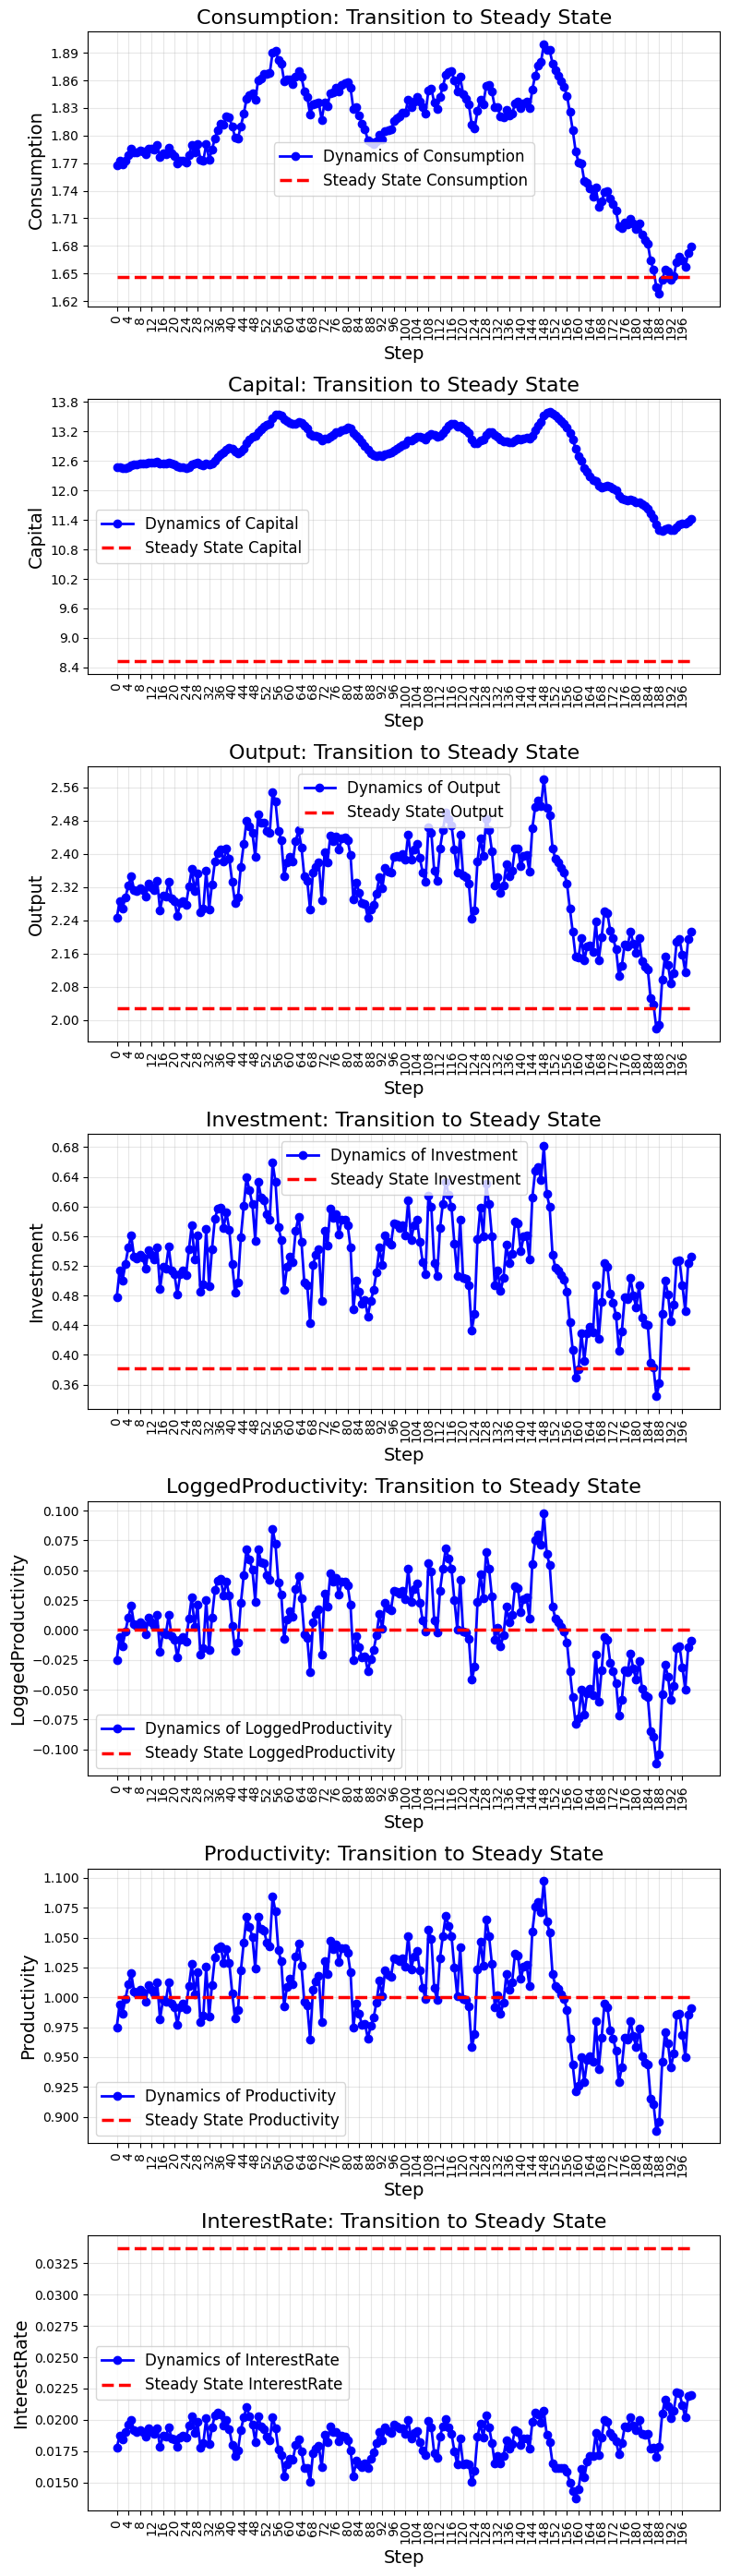

In [37]:
variables_dynamics_plots(raw_data, steady_state)

In [30]:
import hydra
from lib.plots import plot_state_steps, plot_action_steps

In [31]:
config_path = "../dynare/conf/"
config_name = "config"

with hydra.initialize(version_base=None, config_path=config_path):
    config = hydra.compose(config_name=config_name)

plot_state_steps(transitions, config.Gali_2008_chapter_2.rl_env_settings)

NameError: name 'transitions' is not defined

## Validation: Dynamics from raw data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

columns = raw_data.columns

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(5, 10), dpi=200)

for idx, column in enumerate(columns):
    
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    # for i in range(0, len(steps), 4):
        # ax.text(steps[i], column_values[i], f"R={rewards[i]:.2f}", fontsize=9, color='red', ha='right')

    ax.legend(fontsize=6)
    ax.set_xlabel("Step", fontsize=8)
    ax.set_ylabel(f"{column}", fontsize=8)
    ax.set_xticks(steps[::4])
    ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)


## Looks Good To Me

In [ ]:
config_path = "../dynare/conf/"
config_name = "config"

with hydra.initialize(version_base=None, config_path=config_path):
    config = hydra.compose(config_name=config_name)

plot_action_steps(transitions, config.Gali_2008_chapter_2.rl_env_settings)

## Validation: Dynamics from raw data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Nominal Interest Rate", "Real Interest Rate"]

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)), dpi=300)

for idx, column in enumerate(columns):
    
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)

## Looks Good To Me

In [ ]:
from lib.plots import plot_rewards

In [ ]:
plot_rewards(transitions)